In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mostly-ai-prize-data/sequential-training.csv
/kaggle/input/mostly-ai-prize-data/flat-training.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/mostly-ai-prize-data/flat-training.csv')
df.head()

,dog,cat,rabbit,deer,panda,koala,otter,hedgehog,squirrel,dolphin,...,blanket,button,whistle,marble,wagon,storybook,candle,clover,bubble,cookie
0,10,A5DB,NaN,4.46,-2,T2,B9DE,51.8,0,1,...,A8,2,2,0,-0.76,-54,B2,0.38,0,C13
1,10,A5DB,NaN,4.42,0,T3,027A,72.2,1,1,...,A7,16,0,0,-0.76,-48,B0,0.16,0,C15
2,43,027A,8.0,3.11,-1,T0,B9DE,44.2,1,1,...,A4,-25,10,0,-0.88,-39,B0,0.13,0,C1
3,28,63D1,NaN,3.37,-1,T1,027A,41.0,0,1,...,A3,21,9,0,-0.85,-58,B1,0.29,1,C5
4,82,C09E,NaN,3.07,-6,T0,B9DE,46.4,1,1,...,A7,-4,13,0,-0.85,70,B2,0.75,1,C13


In [5]:
df.columns

Index(['dog', 'cat', 'rabbit', 'deer', 'panda', 'koala', 'otter', 'hedgehog',
       'squirrel', 'dolphin', 'penguin', 'turtle', 'elephant', 'giraffe',
       'lamb', 'goat', 'cow', 'horse', 'donkey', 'pony', 'llama', 'mouse',
       'hamster', 'guinea', 'duck', 'chicken', 'sparrow', 'parrot', 'finch',
       'canary', 'bee', 'butterfly', 'ladybug', 'snail', 'frog', 'cricket',
       'tamarin', 'wallaby', 'wombat', 'zebra', 'flamingo', 'peacock', 'bat',
       'fox', 'beaver', 'monkey', 'seal', 'robin', 'loon', 'swan', 'goldfish',
       'minnow', 'mole', 'shrew', 'puffin', 'owl', 'bunny', 'bear', 'chipmunk',
       'cub', 'acorn', 'leaf', 'cloud', 'rainbow', 'puddle', 'berry', 'apple',
       'honey', 'pumpkin', 'teddy', 'blanket', 'button', 'whistle', 'marble',
       'wagon', 'storybook', 'candle', 'clover', 'bubble', 'cookie'],
      dtype='object')

In [6]:
# Load flat training data
flat = pd.read_csv('/kaggle/input/mostly-ai-prize-data/flat-training.csv')
print("Flat-training shape:", flat.shape)
print(flat.head())

Flat-training shape: (100000, 80)
   dog   cat  rabbit  deer  panda koala otter  hedgehog  squirrel  dolphin  \
0   10  A5DB     NaN  4.46     -2    T2  B9DE      51.8         0        1   
1   10  A5DB     NaN  4.42      0    T3  027A      72.2         1        1   
2   43  027A     8.0  3.11     -1    T0  B9DE      44.2         1        1   
3   28  63D1     NaN  3.37     -1    T1  027A      41.0         0        1   
4   82  C09E     NaN  3.07     -6    T0  B9DE      46.4         1        1   

   ...  blanket  button  whistle marble  wagon storybook  candle  clover  \
0  ...       A8       2        2      0  -0.76       -54      B2    0.38   
1  ...       A7      16        0      0  -0.76       -48      B0    0.16   
2  ...       A4     -25       10      0  -0.88       -39      B0    0.13   
3  ...       A3      21        9      0  -0.85       -58      B1    0.29   
4  ...       A7      -4       13      0  -0.85        70      B2    0.75   

  bubble cookie  
0      0    C13  
1   

In [7]:
# Load sequential training data
seq = pd.read_csv('/kaggle/input/mostly-ai-prize-data/sequential-training.csv')
print("Sequential-training shape:", seq.shape)
print(seq.head())

Sequential-training shape: (154456, 11)
   group_id alice  david emily  jacob  james john  mike  lucas  mary  sarah
0  e5f463e4    V0    4.1    A0    NaN   20.0   X6    -1    1.9   2.7    0.0
1  e5f463e4    V0    4.3    A0    NaN   18.0   X5    -1    1.7   1.5    0.0
2  e5f463e4    V0    4.4    A0    NaN   20.0   X6    -1    1.7   1.2    0.0
3  e5f463e4    V0    4.6    A0    NaN   17.0   X4    -1    1.3   0.8    0.0
4  e5f463e4    V0    4.8    A0    NaN   17.0   X4    -1    1.2   0.4    0.0


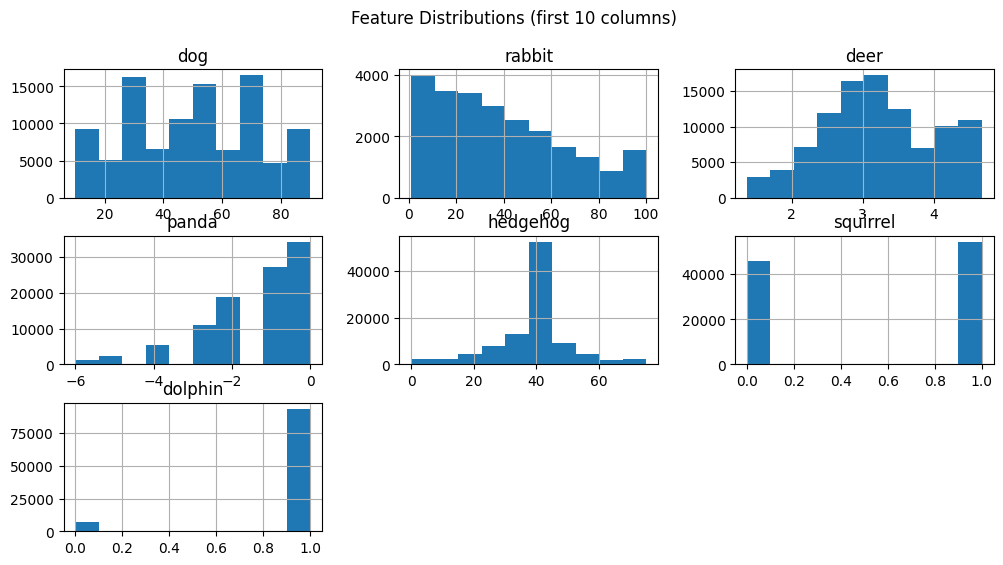

In [8]:
# Plot histogram for the first 10 columns (animal/object features)
flat.iloc[:, :10].hist(figsize=(12, 6))
plt.suptitle("Feature Distributions (first 10 columns)")
plt.show()

In [9]:
# Use 'dog' column as a binary target example (1 if dog presence > 0, else 0)
flat['target'] = (flat['dog'] > 0).astype(int)

In [10]:
# Features are all columns except 'target'
X = flat.drop('target', axis=1)
y = flat['target']

In [11]:
# Split data 80-20 for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Define transformers
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create pipeline
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['dog', 'rabbit', 'deer',
                                                   'panda', 'hedgehog',
                                                   'squirrel', 'dolphin',
                                                   'penguin', 'turtle',
                                                   'elephant', 'lamb', 'cow',
                                                   'horse', 'mouse', 'guinea',
                                                   'chicken', 'sparrow',
                                                   'parrot', 'finch', 'canary',
                                                   'bee', 'ladybug', 'snail',
                                                   'frog', 'cricket', 'wombat',
                                                   'zebra', 'flamingo',
                                                   'peacock', 'b...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cat', 'koala', 'otter',
                                                   'giraffe', 'goat', 'donkey',
                                                   'pony', 'llama', 'hamster',
                                                   'duck', 'butterfly',
                                                   'tamarin', 'wallaby',
                                                   'monkey', 'chipmunk', 'leaf',
                                                   'teddy', 'blanket', 'candle',
                                                   'cookie'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [13]:
# Predict on test data
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



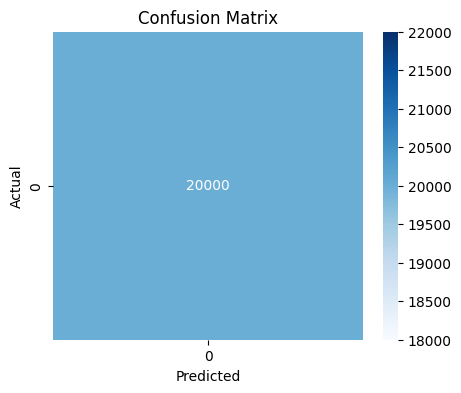

In [14]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()